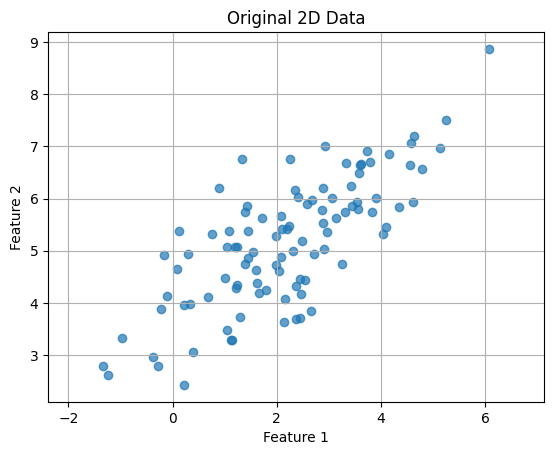

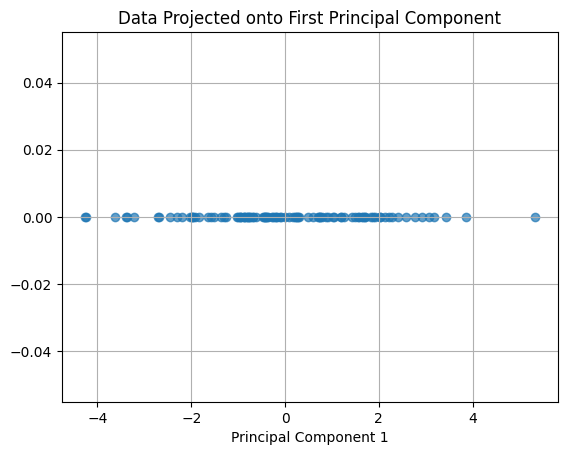

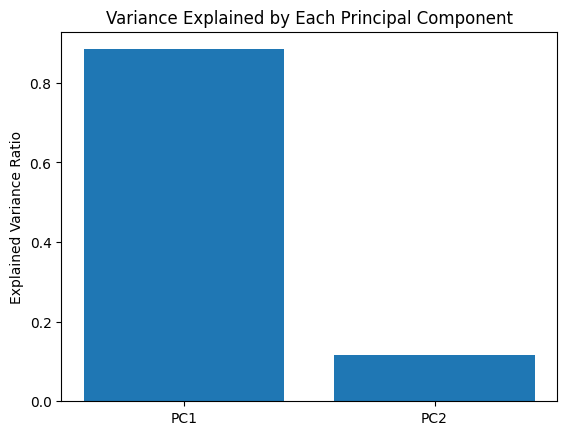

Shape of X: (1797, 64)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


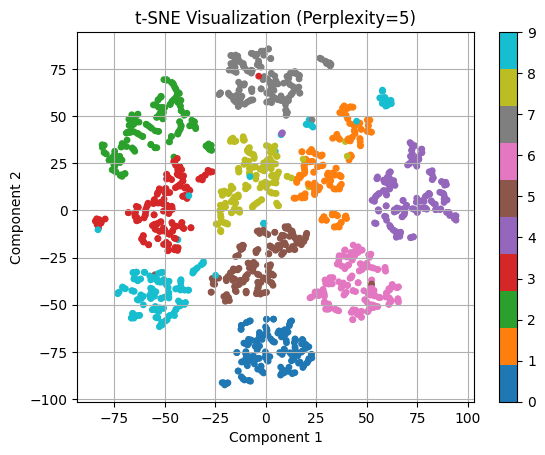

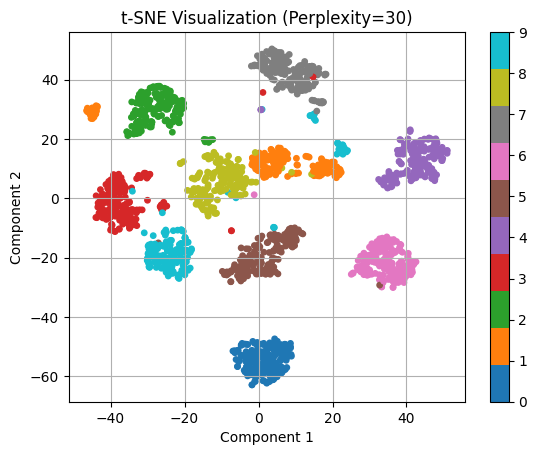

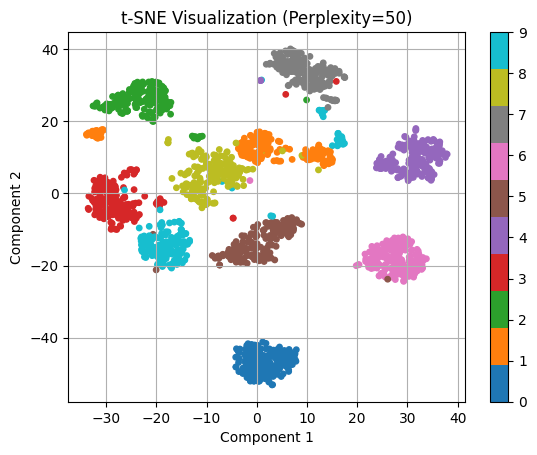

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

# Center the data
X_centered = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Project onto first principal component
X_pca = X_centered @ eig_vecs[:, 0].reshape(-1, 1)

# Plot the 1D projection
plt.figure()
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7)
plt.title("Data Projected onto First Principal Component")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

# Plot variance explained
explained_variance = eig_vals / np.sum(eig_vals)
plt.figure()
plt.bar(['PC1', 'PC2'], explained_variance)
plt.title("Variance Explained by Each Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load data
digits = load_digits()
X = digits.data
y = digits.target

# Print shape
print("Shape of X:", X.shape)  # (1797, 64) -> 8x8 image pixels
print("Unique labels:", np.unique(y))

# Try different perplexities
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)

    plt.figure()
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=15)
    plt.colorbar(scatter, ticks=range(10))
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

